<a href="https://colab.research.google.com/github/ajengayufc/Basic-Processing-Data/blob/main/10_6_Review_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis with Python**

**DATA WRANGLING**

Table of content
-Identify and handle missing values
  1. **Identify missing values**
  2.** Deal with missing values**
  3.** Correct data format** 

-Data standardization
-Data Normalization (centering/scaling)
-Binning
-Indicator variable


**TUJUAN DATA WRANGLING? **: Data Wrangling adalah proses konversi data dari format awal ke format yang mungkin lebih baik untuk dianalisis.

SOALLL????
Berapa tingkat konsumsi bahan bakar (L/100k) untuk mobil diesel?

untuk itu, kita perlu import data 'Automobile Data Set'

In [66]:
import pandas as pd
import matplotlib.pylab as plt

Berikut adalah link data 'Automobile Data Set'

In [67]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

Daftar header python yang berisi nama header

In [68]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Gunakan metode Pandas read_csv() untuk memuat data dari alamat web. Setel parameter "nama" sama dengan daftar "header" Python

In [69]:
df = pd.read_csv(filename, names = headers)

Gunakan metode (head() untuk menampilkan 5 awal baris dari data frame

In [70]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [71]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Seperti yang bisa kita lihat, beberapa tanda tanya muncul di kerangka data; itu adalah nilai-nilai yang hilang yang dapat menghambat analisis kami lebih lanjut.

Jadi, bagaimana kita mengidentifikasi semua nilai yang hilang itu dan mengatasinya?

Bagaimana cara bekerja dengan data yang hilang?

**Langkah-langkah untuk bekerja dengan data yang hilang:**

1. mengidentifikasi data yang hilang
2. menangani data yang hilang
3. format data yang benar

1. **IDENTIFY AND HANDLE MISSING VALUES**

IDENTIFIKASI MISSING VALUES

**Konversi "?" ke NaN**

Di dataset mobil, data yang hilang dilengkapi dengan tanda tanya "?". Ubah ? dengan NaN(Not a Number) yang berfungsi sebagai penanda nilai yang hilang default Python. Gunakan fungsi :

**.replace(A,B,inplace = true) **. untuk menggantikan A dengan B


In [72]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**EVALUATING FOR MISSING DATA**

Nilai data yng hilang / missing values telah dikonversi ke default Python. Python digunakan untuk membangun fungsi untuk mengidentifikasi missing values. Ada 2 metode untuk mendeteksi data yang hilang :
1.   .isnull()
2.   .nitnull()

Outputnya adalah nilai boolean yang mengidentifikasi apakah nilai tersebut sesuai dengan argument pada missing data


In [73]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


'True' berarti untuk missing values, sedangkan 'False' untuk bukan missing values

Hitung nilai yang hilang di setiap kolom
Menggunakan for loop di Python untuk mengetahui jumlah nilai yang hilang di setiap kolom. Seperti disebutkan di atas, "True" mewakili nilai yang hilang, "False" berarti nilai ada dalam kumpulan data. Dalam badan for loop, metode ".value_counts()" menghitung jumlah nilai "True".

In [74]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Berdasarkan rangkuman diatas, setiap kolom memiliki 250 baris data. 7 kolom dengan missing data :

1. "normalized-losses": 41 missing data
2. "num-of-doors": 2 missing data
3. "bore": 4 missing data
4. "stroke" : 4 missing data
5. "horsepower": 2 missing data
6. "peak-rpm": 2 missing data
7. "price": 4 missing data


**2. DEAL WITH MISSING DATA**

How to deal with missing data?
1. drop data
a. drop the whole row
b. drop the whole column
2. replace data
a. replace it by mean
b. replace it by frequency
c. replace it based on other functions

Seluruh kolom harus dibuang hanya jika sebagian besar entri dalam kolom kosong. Terdapat beberapa metode untuk menggantikan data disetiap kolom yang berbeda. 

A. Replace by mean :
    - "normalized-losses": 41 data yang hilang, ganti dengan mean
    - "stroke": 4 data hilang, ganti dengan mean
    - "bore": 4 data hilang, ganti dengan mean
    - "horsepower": 2 data hilang, ganti dengan mean
    - "peak-rpm": 2 data hilang, ganti dengan mean

B. Replace by frequency :
    - "num-of-doors": 2 data hilang, ganti dengan "empat".
       ** Alasan**: 84% sedan adalah empat pintu. Karena empat pintu paling sering, kemungkinan besar terjadi

C. Drop the whole row : 
    - "price": 4 data hilang, cukup hapus seluruh baris
**Reason:** harga adalah apa yang ingin kita prediksi. Entri data apa pun tanpa data harga tidak dapat digunakan untuk prediksi; oleh karena itu setiap baris sekarang tanpa data harga tidak berguna

Hitung rata-rata kolom 

In [75]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized_losses:", avg_norm_loss)

Average of normalized_losses: 122.0


Replace NaN dengan mean value pada kolom 'normalized_losses'

In [76]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

Hitung nilai rata2 untuk kolom 'bore'

In [77]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Avera of bore:", avg_bore)

Avera of bore: 3.3297512437810957


Replace NaN dengan rata2 value

In [78]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

Replace Nan untuk kolom 'stroke'

In [79]:
df["stroke"].replace(np.nan, avg_norm_loss, inplace=True)

Hitung rata2 nilai untuk kolom 'horsepower'

In [80]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average of horsepower:", avg_horsepower)

Average of horsepower: 104.25615763546799


Replace NaN dengan nilai value

In [81]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Hitung rata2 nilai untuk kolom 'peak-rpm'

In [82]:
avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
print("Average of peak-rpm:", avg_peakrpm)

Average of peak-rpm: 5125.369458128079


Replace Nan dengan mean

In [83]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Untuk melihat nilai mana yang ada di kolom tertentu, gunakan metode ".value_counts()"

In [84]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Dapat dilihat bahwa 4 pintu adalah jenis yang paling umum. Gunakan metode ".idsmax()" untuk menghitung jenis yang umum secara otomatis : 

In [85]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [86]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Terakhir, hilangkan semua baris yang tidak memiliki daftar harga 'price' :


In [87]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [88]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**3. CORRECT DATA FORMAT**

Langkah terakhir dari data cleaning adalah memeriksa dan memastikan bahwa semua data dalam format yang benar (int, float, text atau yg lainnya). Di panda, biasanya menggunakan

.dtype  : untuk memeriksa tipe data
.astype : untuk mengubah tipe data

List data tiap kolom

In [89]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Dari data diatas, beberapa kolom bukan tipe data yang benar, Variabel numerik harus memiliki tipe 'float' atau 'int' dan variabel string dengan kategori harus memiliki tipe 'objek', misalnya variabel 'bore', dan 'stroke' adalah nilai njumerik yang menggambarkan mesik. Jadi variabel tersebut harus bertipe 'float' atau 'int', namun variabel tersebut ditampilkan dalam bentuk objek. 

Variabel/tipe data tersebut harus dikonversi menjadi format yang tepat untuk setiap kolom dengan metode "astype()"

Konversi tipe data ke format yang tepat proper

In [90]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")

In [91]:
df[["normalized-losses"]] = df[["normalized-losses"]].astype("float")

In [92]:
df[["price"]] = df[["price"]].astype("float")


In [93]:
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [94]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**DATA STANDARSDIZATION**

Standarisasi Data merupakan istilah untuk jenis normalisasi data tertentu, mengurangi rata-rata dan membaginya dengan standar deviasi

Standardisasi adalah proses mengubah data ke dalam format umum yang memungkinkan peneliti untuk membuat perbandingan yang berarti.

Contoh

Ubah mpg ke L/100km:

Dalam kumpulan data, kolom konsumsi bahan bakar "city-mpg" dan "highway-mpg" diwakili oleh unit mpg (mil per galon). 

We will need to apply **data transformation** to transform mpg into L/100km?


Rumus untuk konversi satuan adalah

L/100km = 235 / mpg

Kita bisa melakukan banyak operasi matematika secara langsung di Pandas

In [95]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [96]:
# Convert mpg kr L/100km dengan operasi matematika

df['city-L/100km'] = 235/df["city-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [97]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


lakukan hal yang sama dengan 'highway'

In [98]:
# Convert mpg kr L/100km dengan operasi matematika

df['highway-L/100km'] = 235/df["highway-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


**DATA NORMALIZATION**

Normalisasi adalah proses transformasi nilai dari beberapa variabel ke dalam range yang sama. Normalisasi tipikal termasuk penskalaan variabel sehingga rata-rata variabel adalah 0, penskalaan variabel sehingga variansnya adalah 1, atau penskalaan variabel sehingga nilai variabel berkisar dari 0 hingga 1


Contoh

Untuk mendemonstrasikan normalisasi, katakanlah kita ingin menskalakan kolom "panjang", "lebar" dan "tinggi"

Target: ingin menormalkan variabel-variabel tersebut sehingga nilainya berkisar dari 0 hingga 1.

Pendekatan: ganti nilai asli dengan (nilai asli)/(nilai maksimum)

In [99]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [100]:
df['width'] = df['width']/df['width'].max()
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [101]:
df['height'] = df['height']/df['height'].max()
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


**BINNING**

Binning adalah proses mengubah variabel numerik kontinu menjadi 'tempat sampah' kategoris diskrit, untuk analisis berkelompok.


Contoh:

Dalam dataset , "horsepower" adalah variabel bernilai nyata mulai dari 48 hingga 288, ia memiliki 57 nilai unik. Bagaimana perbedaan harga antara mobil dengan tenaga kuda tinggi, tenaga kuda sedang, dan tenaga kuda kecil (3 jenis)? 

gunakan metode Pandas 'cut' untuk membagi kolom 'horsepower' menjadi 3 bin

**CONTOH BINNING DATA DI PANDAS**

Ubah data ke format yang benar

In [102]:
df['horsepower'] = df['horsepower'].astype(int, copy=True)

Lakukan plot histogram untuk 'horsepower', untuk melihat bagaimana distribusi 'horsepower'

Text(0.5, 1.0, 'horsepower bin')

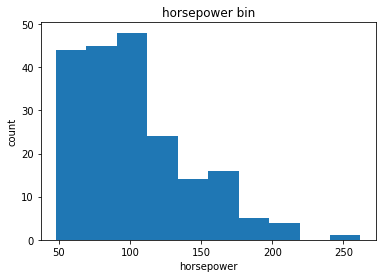

In [103]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['horsepower'])


# set x/y labels and plot title
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bin')


Untuk mengubah 3 bin menjadi ukuran yang sama, maka gunakan fungsi linspace(start_value,end_value,numbers_generated)


Jika ingin memasukkan nilai minimum dari horsepower maka start_value=min(df['horsepower'])
Jika ingin memasukkan nilai maksimum dari horsepower maka start_value=max(df['horsepower'])
Karena ingin membuat 3 bin dengan panjang yang sama, maka harus ada 4 pembagi, sehingga number_generated=4



In [104]:
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Ubah nama grup

In [105]:
group_names = ['low', 'medium', 'high']


Gunakan fungsi 'cut' untuk menentukan setiap nilai 'df['horsepower']

In [106]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,low
1,111,low
2,154,medium
3,102,low
4,115,low
5,110,low
6,110,low
7,110,low
8,140,medium
9,101,low


Jumlah kendaraan disetiap bin

In [107]:
df['horsepower-binned'].value_counts()


low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

Plot distribusi setiap bin

AttributeError: ignored

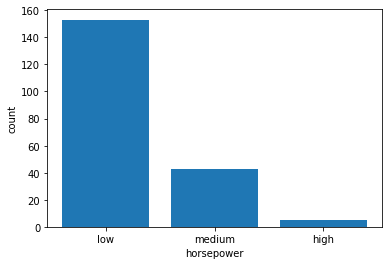

In [108]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

#set x/y labels and plot title
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.tilte('horsepower bins')

Dari plot diatas, terdapat 3 kategori low, medium dan high. dari interval 57 menjadi 3 bin. 

**BINS VISUALIZATION**

Biasanya histogram digunakan untuk mendistribusikan bins yang telah dibuat diatas

Text(0.5, 1.0, 'horsepower bins')

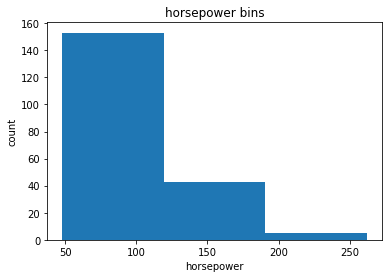

In [109]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Plot di atas menunjukkan hasil binning untuk atribut "horsepower"

**Indicator variable (or dummy variable)**

Variabel indikator (atau variabel dummy) adalah variabel numerik yang digunakan untuk melabeli kategori, disebut 'dummies' karena angka-angka itu sendiri tidak memiliki arti yang melekat.

variabel kategori digunakan untuk analisis regresi di modul selanjutnya

**Contoh**
kolom "fuel-type" memiliki dua nilai unik, "gas" atau "diesel". Regresi tidak mengerti kata-kata, hanya angka. Untuk menggunakan atribut ini dalam analisis regresi, gubah "fuel-type" menjadi variabel indikator.

In [110]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

dapatkan variabel indikator dan tetapkan ke frame data "dummy_variable_1"

In [111]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Ubah nama kolom

In [112]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Nilai 0 untuk mewakili gas dan nilai 1 untuk mewakili diesel di kolom 'fuel-type'. 

In [113]:
#memasukkan kembali kolom diatas ke data sheet semula
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [114]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,5.619950,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,16.627881,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,122.000000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000


Dua kolom terakhir sekarang menjadi representasi variabel indikator dari variabel jenis bahan bakar. Semuanya 0 dan 1 sekarang

In [115]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,5.619950,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,16.627881,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,122.000000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000


Simpan ke bentuk csv

In [116]:
df.to_csv('clean_df.csv')